In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#Bekommen Daten von csv-Datai, die Information über Rating vom Filmen enthalten
df_rating=pd.read_csv("archive/ratings.csv")
#Bekommen Daten mit Filmenmetadaten von csv-Datai(Laufzeit,Budget...).
df_metadata=pd.read_csv("archive/movies_metadata.csv")


#Löschen alle Zeile, wo im bestimmte Spallte  NaN order nicht numeric Daten geben
def clean_not_numbers_value(df,subset):
    #Konvertieren nich numeric Daten in einer Spalter in NaN
    df[subset]=pd.to_numeric(df[subset], errors='coerce')
    #Löschen alle NaN Values
    df=df.dropna(subset=subset)
    return df
#Reinigt  Daten für die Analyse 
#Nimmt als Argument den Name einer Zeile in DataFrame mit Metadate, die quantative Values hat
def prepare_data_for_rating_analysys(df_metadata, df_rating, x_value):
    #Ratings,die zum gleigen Film gehören zuerst Gruppieren  und dann mittlere Wert von Rating für jeder Film finden
    rating_y=df_rating.groupby('movieId')['rating'].mean()
    #Indeces, die den Filmen Id entsprechen, in  Integer converieren
    rating_y.index = rating_y.index.astype(int)

    #Löschen alle Zeile, wo im bestimmte Spallte  NaN order nicht numeric Daten geben
    df_metadata=clean_not_numbers_value(df_metadata,x_value)
    #Filmenid im DataFrame in Integer convertieren
    df_metadata['id'] = df_metadata['id'].astype(int)
    #Löschen die Duplikate von Filmen(ID) im DataFrame
    df_metadata = df_metadata.drop_duplicates(subset='id', keep='first')

    #Lassen in DateFrame nur die Zeile, wo id von einem Film entspricht einem Index in der Serie und sorten mittthilfe Id vom Film
    df_metadata=df_metadata[df_metadata['id'].isin(rating_y.index)].sort_values(by='id')
    #Lassen in DateFrame nur die Zeile, wo id von einem Film entspricht einem Index in der Serie sorten mittthilfe Id vom Film
    rating_y=rating_y[rating_y.index.isin(df_metadata['id'])].sort_index()

    #Bekommen eine Serie vom DataFrame und Id von Filmen gelten as Indeces
    values_x = df_metadata.set_index("id")[x_value]

    #Test, ob die Grosse von der Serien gleich ist
    print(rating_y.size)
    print(values_x.size)
    return values_x, rating_y
values_x,rating_y=prepare_data_for_rating_analysys('budget')





C:\Users\49160\AppData\Local\Temp\ipykernel_384\3136719512.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata=pd.read_csv("archive/movies_metadata.csv")


UnboundLocalError: local variable 'df_metadata' referenced before assignment

In [2]:
import numpy as np
#Zeigen Zusammenhang zwischen Bewertunen(rating_y Argument) und Values for X-Axis(values_x Argument)
#x_axis wird X-Axis Label
def show_rating_correlation(x_axis,values_x, rating_y):
    #Ausrechnen Koefizients für die lineale Funktion
    #a,b in ax+b=y
    coefficients = np.polyfit(values_x,rating_y, deg=1)
    #Gibt einen Array mit Y-Values zurück
    py=np.polyval(coefficients,values_x)
    # Setzen Diagrammgrosse(in inches)
    plt.figure(figsize=(10, 6))

    #Zeigen Grid Hintergrund
    plt.grid(True)
    #Streudiagramm erstellen 
    plt.scatter(values_x, rating_y, alpha=0.5)

    # Achsenbeschriftungen setzen
    plt.xlabel("Budget")
    plt.ylabel("Rating")

    # Titel des Diagramms setzen
    plt.title("Zusammenhangs zwischen Bewertung und Budget")

    # Eine lineare Anpassungskurve hinzufügen
    #label wird für die Legende verwendet
    # color="red"' macht die Linie rot
    plt.plot(values_x, py, label='Linear Fit', color='red')
    #Legende anzeigen
    plt.legend()
    #diagramm anzeigen
    plt.show()





C:\Users\49160\AppData\Local\Temp\ipykernel_17548\3368338247.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata=pd.read_csv("archive/movies_metadata.csv")


7565
7565


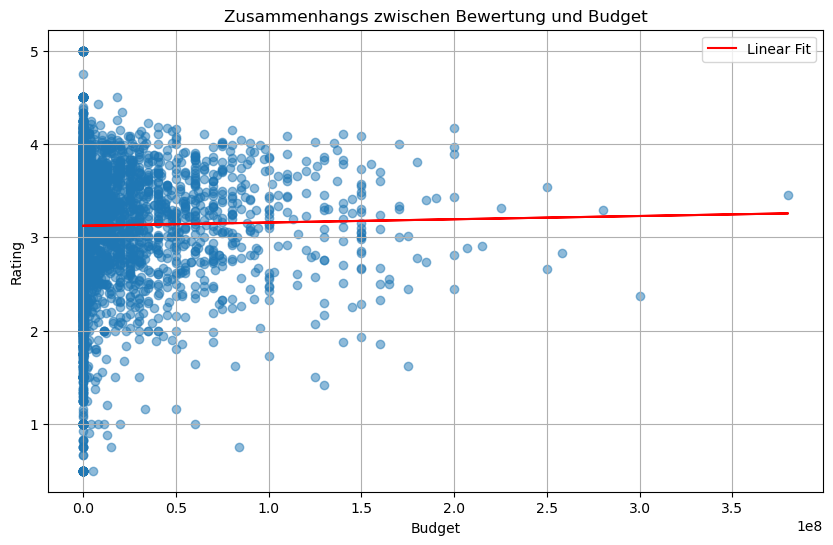

In [3]:
values_x,rating_y=prepare_data_for_rating_analysys('budget')
show_rating_correlation('Budget',values_x,rating_y)